**Импорт библиотек**

In [13]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.metrics import r2_score,mean_squared_error

**Импорт датасетов**

In [15]:
test = pd.read_csv('datasets/test.csv')
train_data = pd.read_csv('datasets/train.csv')
train_data.info()
train_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Преобразование данных в таблице**

Все признаки в таблице являются либо категориальными, как погода и сезон, или же численными (скорость ветра, температура), за исключением
признака **datetime** включающего в себя, такие параметры, как год, месяц, день, а также время. Для удобства анализа зависимостей, разделим этот признак на 4 подпризнака:


In [17]:

train_data['datetime'] = pd.to_datetime(train_data['datetime']) #приводим объекты в столбце к типу datetime дял возможности извлекать его свойства
train_data.insert(0, 'year', train_data['datetime'].apply(lambda t:t.year))
train_data.insert(1, 'month', train_data['datetime'].apply(lambda t:t.month))
train_data.insert(2, 'day', train_data['datetime'].apply(lambda t:t.day))
train_data.insert(3, 'weekday', train_data['datetime'].apply(lambda t:t.dayofweek))
train_data.insert(4, 'hour', train_data['datetime'].apply(lambda t:t.hour))
train_data = train_data.drop('datetime', axis = 1) # удаляем столбец datetime
train_data.head(5)


,year,month,day,weekday,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011,1,1,5,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011,1,1,5,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011,1,1,5,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011,1,1,5,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011,1,1,5,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Анализ данных и визуализация**

Зависимости числа арендованных велосипедов от временных параметров

Text(0.2, 0.99, 'Общее число прокатов')

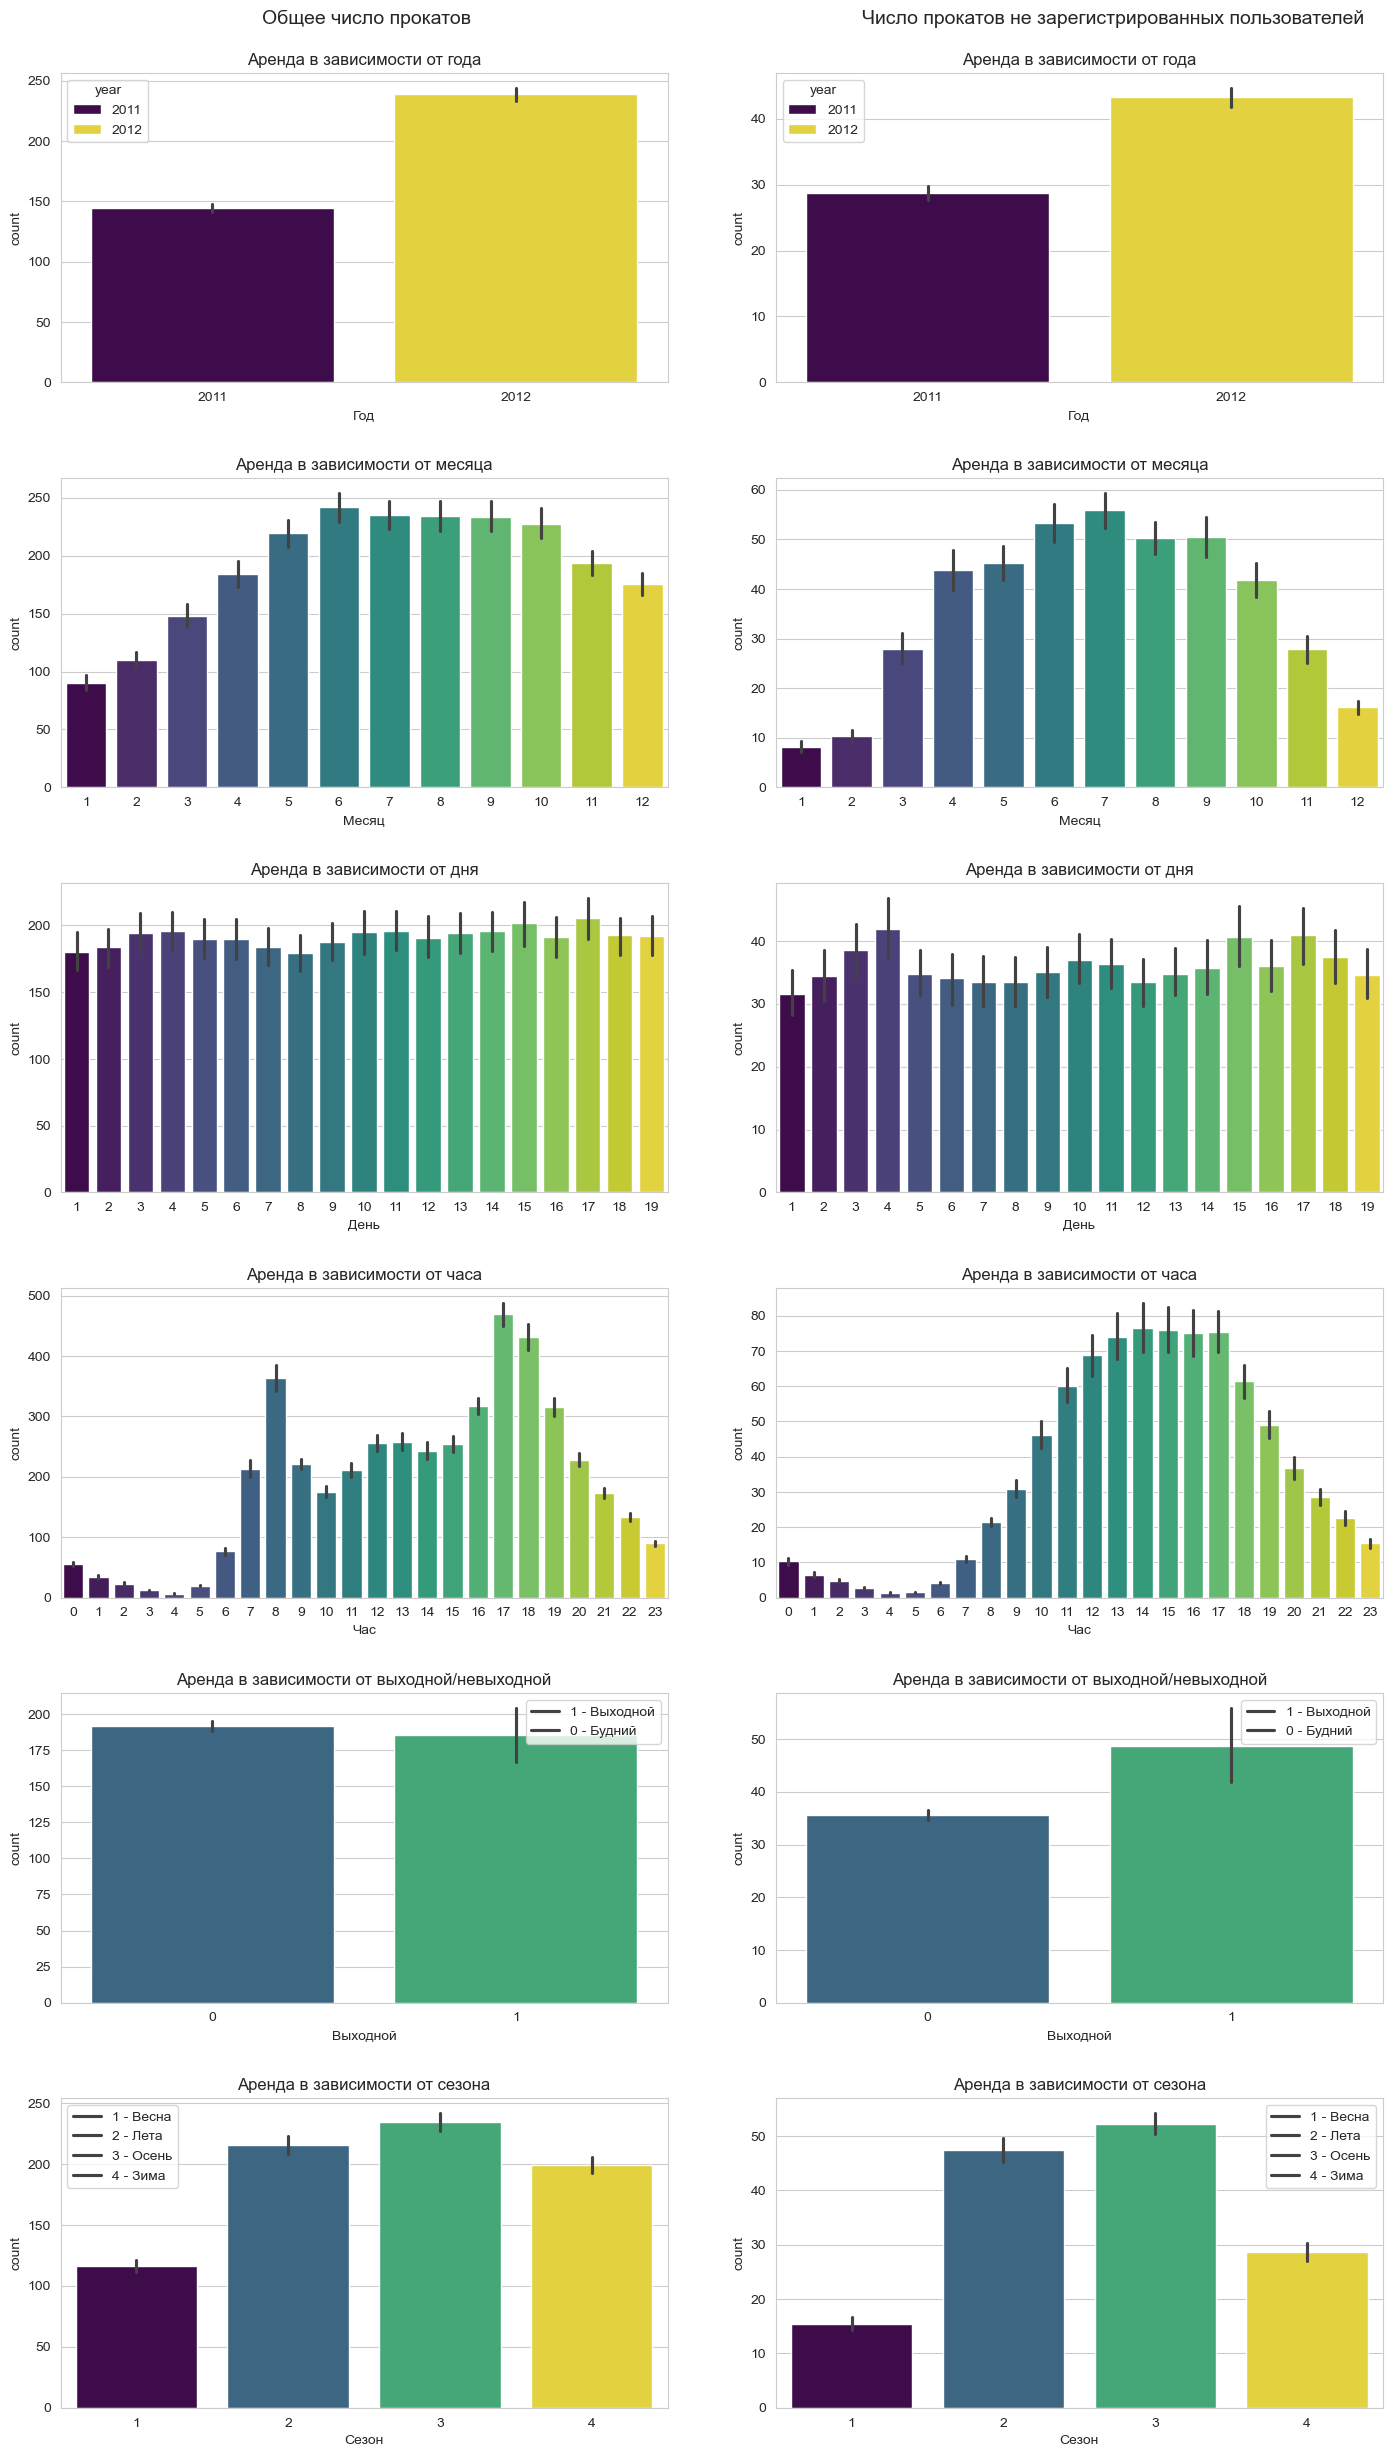

In [20]:
sb.set_style("whitegrid")
plt0, axes = plt.subplots(6, 2, figsize=(15, 25))
plt0.tight_layout(pad=5.0)

plot_year = sb.barplot(data=train_data, x="year", y="count", palette = "viridis", hue="year",  ax = axes[0, 0])
plot_year.set_title("Аренда в зависимости от года")
plot_year.set_xlabel("Год")
plot_year.set_ylabel("count")

plot_month = sb.barplot(data=train_data, x="month", y="count", palette = "viridis", hue="month",  ax = axes[1, 0])
plot_month.set_title("Аренда в зависимости от месяца")
plot_month.set_xlabel("Месяц")
plot_month.set_ylabel("count")
plot_month.legend_.remove()

plot_day = sb.barplot(data=train_data, x="day", y="count", palette = "viridis", hue="day",  ax = axes[2, 0])
plot_day.set_title("Аренда в зависимости от дня")
plot_day.set_xlabel("День")
plot_day.set_ylabel("count")
plot_day.legend_.remove()

plot_hour = sb.barplot(data=train_data, x="hour", y="count", palette = "viridis", hue="hour",  ax = axes[3, 0])
plot_hour.set_title("Аренда в зависимости от часа")
plot_hour.set_xlabel("Час")
plot_hour.set_ylabel("count")
plot_hour.legend_.remove()

plot_day_holiday = sb.barplot(data=train_data, x="holiday", y="count", palette = "viridis", hue="holiday",  ax = axes[4, 0])
plot_day_holiday.set_title("Аренда в зависимости от выходной/невыходной")
plot_day_holiday.set_xlabel("Выходной")
plot_day_holiday.set_ylabel("count")
plot_day_holiday.legend(["1 - Выходной", "0 - Будний"])
#plot_day_holiday.legend_.remove()

plot_season = sb.barplot(data=train_data, x="season", y="count", palette = "viridis", hue="season",  ax = axes[5, 0])
plot_season.set_title("Аренда в зависимости от сезона")
plot_season.set_xlabel("Сезон")
plot_season.set_ylabel("count")
plot_season.legend(["1 - Весна", "2 - Лета", "3 - Осень", "4 - Зима"])

plot_year = sb.barplot(data=train_data, x="year", y="casual", palette = "viridis", hue="year",  ax = axes[0, 1])
plot_year.set_title("Аренда в зависимости от года")
plot_year.set_xlabel("Год")
plot_year.set_ylabel("count")

plot_month = sb.barplot(data=train_data, x="month", y="casual", palette = "viridis", hue="month",  ax = axes[1, 1])
plot_month.set_title("Аренда в зависимости от месяца")
plot_month.set_xlabel("Месяц")
plot_month.set_ylabel("count")
plot_month.legend_.remove()

plot_day = sb.barplot(data=train_data, x="day", y="casual", palette = "viridis", hue="day",  ax = axes[2, 1])
plot_day.set_title("Аренда в зависимости от дня")
plot_day.set_xlabel("День")
plot_day.set_ylabel("count")
plot_day.legend_.remove()

plot_hour = sb.barplot(data=train_data, x="hour", y="casual", palette = "viridis", hue="hour",  ax = axes[3, 1])
plot_hour.set_title("Аренда в зависимости от часа")
plot_hour.set_xlabel("Час")
plot_hour.set_ylabel("count")
plot_hour.legend_.remove()

plot_day_holiday = sb.barplot(data=train_data, x="holiday", y="casual", palette = "viridis", hue="holiday",  ax = axes[4, 1])
plot_day_holiday.set_title("Аренда в зависимости от выходной/невыходной")
plot_day_holiday.set_xlabel("Выходной")
plot_day_holiday.set_ylabel("count")
plot_day_holiday.legend(["1 - Выходной", "0 - Будний"])
#plot_day_holiday.legend_.remove()

plot_season = sb.barplot(data=train_data, x="season", y="casual", palette = "viridis", hue="season",  ax = axes[5, 1])
plot_season.set_title("Аренда в зависимости от сезона")
plot_season.set_xlabel("Сезон")
plot_season.set_ylabel("count")
plot_season.legend(["1 - Весна", "2 - Лета", "3 - Осень", "4 - Зима"])

#plt0.suptitle('Число прокатов не зарегистрированных пользователей', size=15, x= 0.8, y = 1)

plt.text(.6, 0.99, 'Число прокатов не зарегистрированных пользователей', transform = plt0.transFigure, size = 14)
plt.text(.2, 0.99, 'Общее число прокатов', transform = plt0.transFigure, size = 14)


**Из графиков выше можно сделать ряд выводов:**
* Число прокатов в 2012 году значительно выросло на фоне 2011.
* Самые популярные месяцы для аренды - летние.
* В выходные и рабочие дни число арендованных велосипедов отличается незначительно.
* Часы с самым большим числом аренд, это 8 и 17-18 часов, что скорее всего связано с началом и концом рабочего дня
* Аренда весной сильно ниже чем в другие сезоны. Вероятно это связано либо с дождливым весенним климатом,
 либо таяньем снега в этом регионе.
 
Особенности для незарегистрированных пользователей, что большая часть аренд приходится на лето и осень. 
Это может быть связано с приездом туристов или резким открытием новых точек аренды в эти месяцы. 



In [22]:
train_data[train_data["season"] == 1]["temp"].mean() # Вероятней все же с сезоном дождей так как температура весной значительно выше 0.

12.53049143708116

**Влияние каждого параметра на целевую переменную**

Чтобы определить, какие параметры оказывают наибольшее влияние на переменную метки (кол-ва аренд) построим карту температур:

<Axes: >

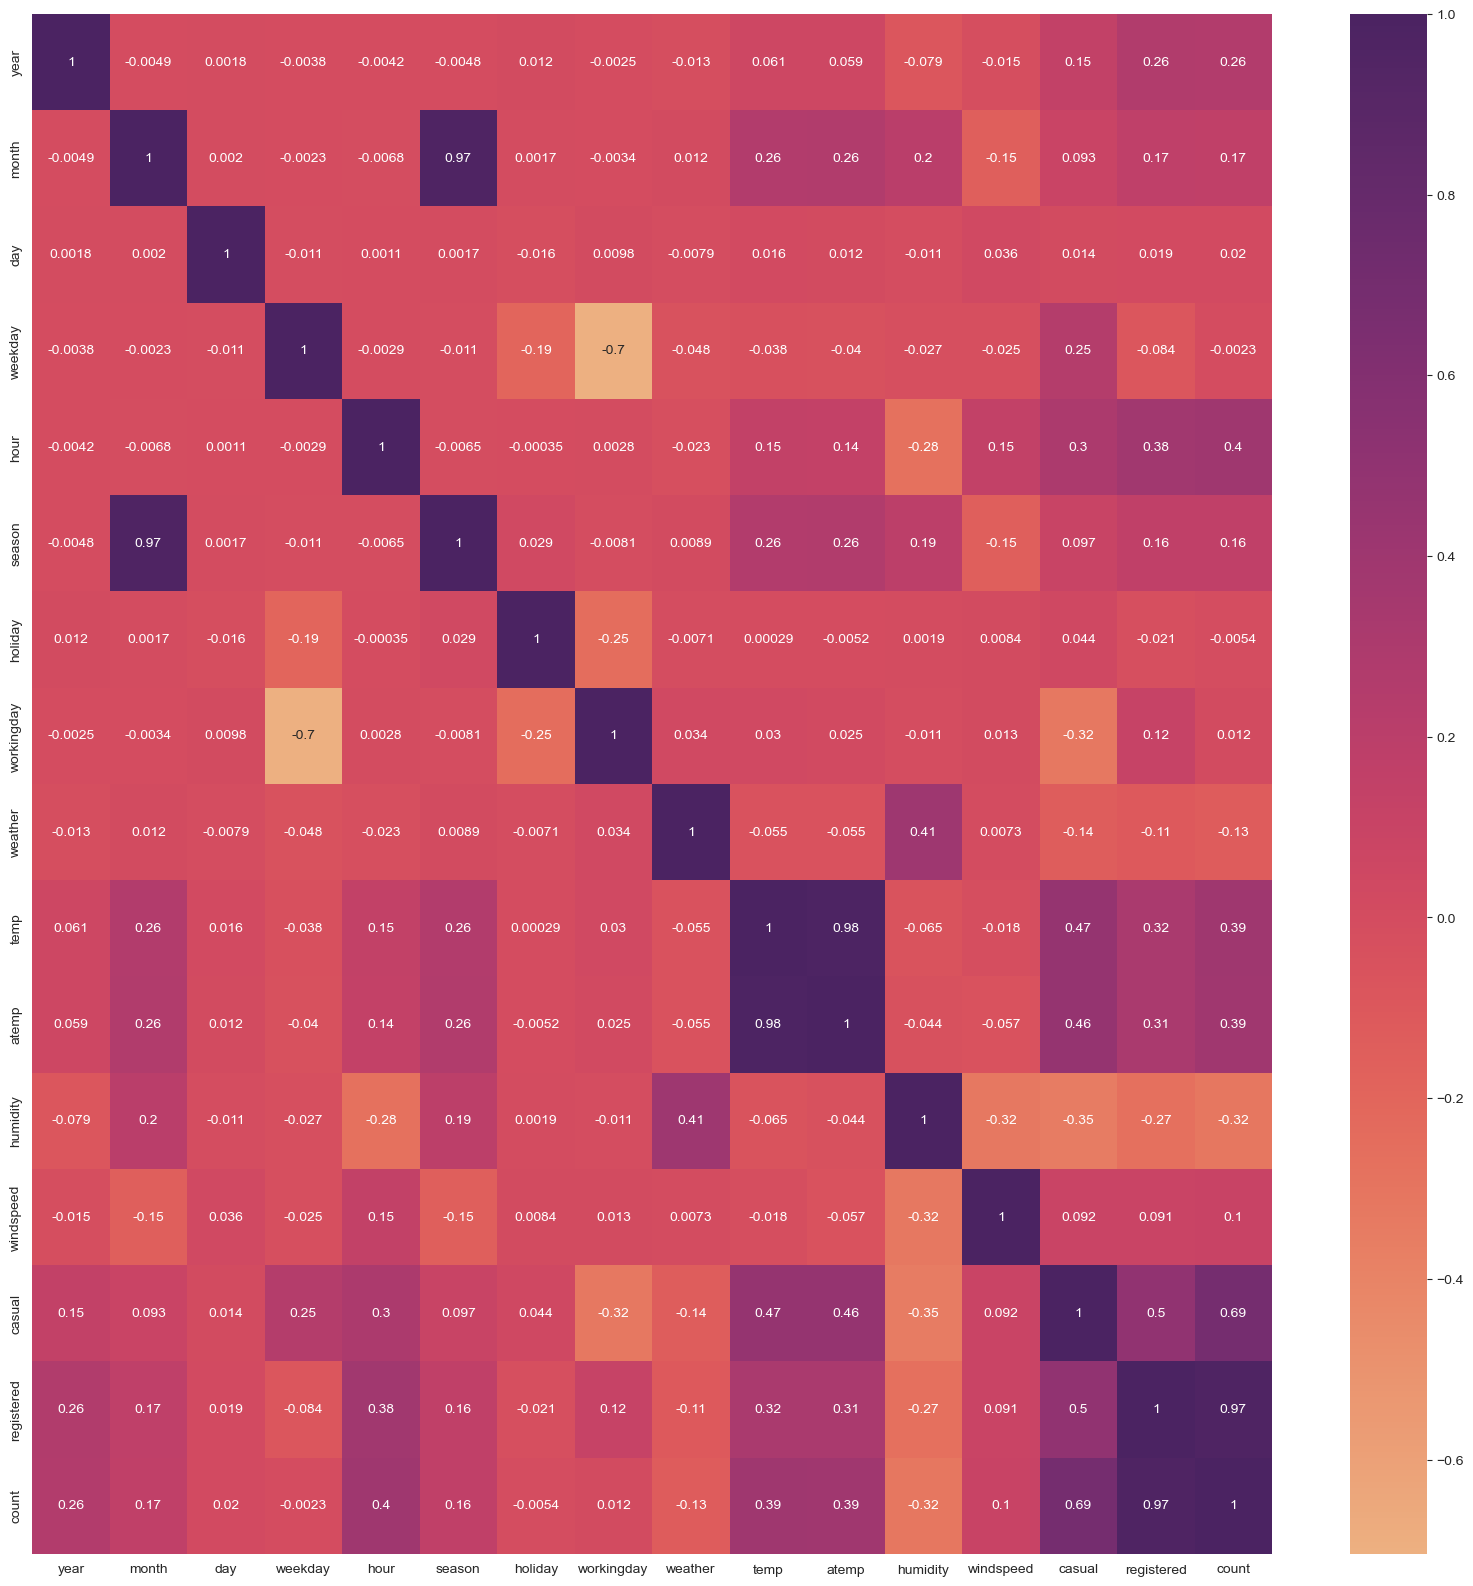

In [24]:
plt.figure(figsize=(20,20))
sb.heatmap(data=train_data.iloc[:, :].corr(), cmap='flare', annot=True) # Использую corr для расчета корреляций между каждой парой признаков


**Из heatmap видно, что наибольшее влияние на count оказывают:**
* hour
* atemp и temp
* year

Параметры **registered** и **casual** не рассматриваем так как они являются составляющими count.

Параметр year не информативен, так как в выборке присудствуют данные только за 2 года. Следовательно основное влияние имеет температура и часы аренды



#### Теперь проанализируем число прокатов в зависимости от погодных условий

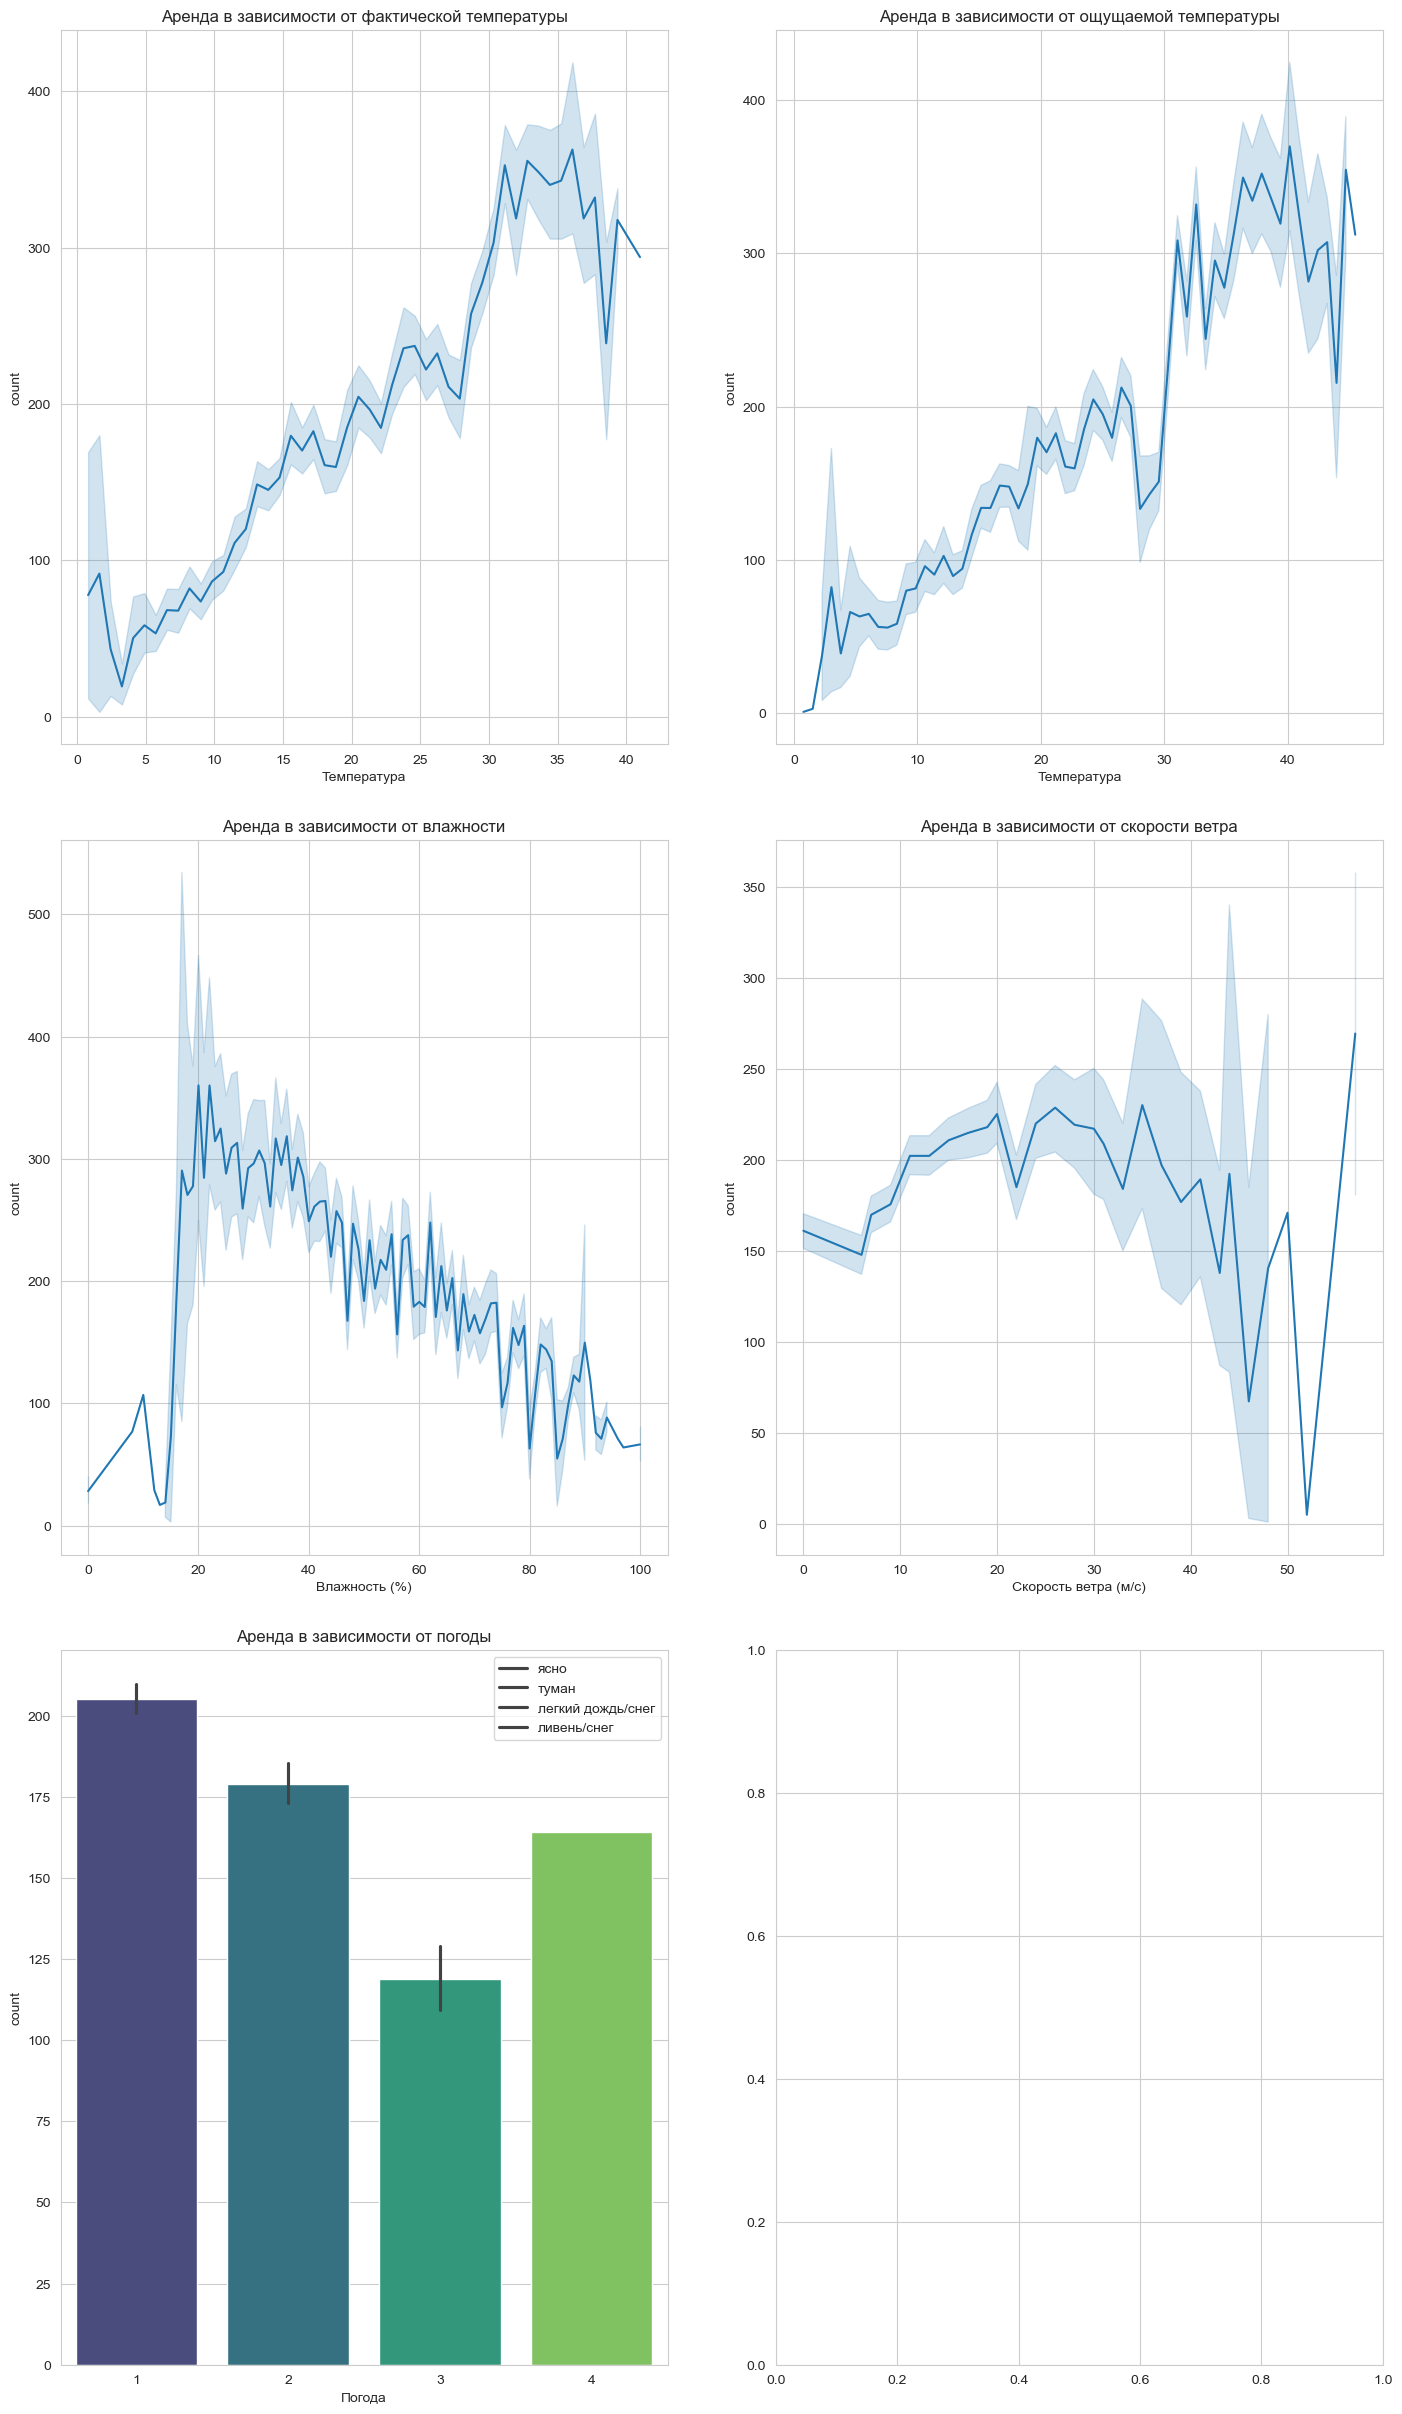

In [27]:
sb.set_style("whitegrid")
plt0, axes = plt.subplots(3, 2, figsize=(15, 25))
plt0.tight_layout(pad=5.0)

plot_temp = sb.lineplot(data=train_data.loc[:, ['temp', 'count']],  x="temp", y="count", palette = "viridis",   ax = axes[0, 0])
plot_temp.set_title("Аренда в зависимости от фактической температуры")
plot_temp.set_xlabel("Температура")
plot_temp.set_ylabel("count")

plot_atemp = sb.lineplot(data=train_data.loc[:, ['atemp', 'count']],  x="atemp", y="count", palette = "viridis",   ax = axes[0, 1])
plot_atemp.set_title("Аренда в зависимости от ощущаемой температуры")
plot_atemp.set_xlabel("Температура")
plot_atemp.set_ylabel("count")

plot_humidity = sb.lineplot(data=train_data.loc[:, ['humidity', 'count']],  x="humidity", y="count", palette = "viridis",   ax = axes[1, 0])
plot_humidity.set_title("Аренда в зависимости от влажности")
plot_humidity.set_xlabel("Влажность (%)")
plot_humidity.set_ylabel("count")

plot_windspeed = sb.lineplot(data=train_data.loc[:, ['windspeed', 'count']],  x="windspeed", y="count", palette = "viridis",   ax = axes[1, 1])
plot_windspeed.set_title("Аренда в зависимости от скорости ветра")
plot_windspeed.set_xlabel("Скорость ветра (м/c)")
plot_windspeed.set_ylabel("count")

plot_weather = sb.barplot(data=train_data.loc[:, ['weather', 'count']],  x="weather", y="count", palette = "viridis",   ax = axes[2, 0])
plot_weather.set_title("Аренда в зависимости от погоды")
plot_weather.set_xlabel("Погода")
plot_weather.set_ylabel("count")
plot_weather.legend(["ясно","туман","легкий дождь/снег","ливень/снег"])


**Из графиков выше можно сделать следующие выводы:**
* Наибольшее число велосипедов арендуют при температуре 30-35 градусов по цельсию.
* Больше аренд, когда влажность низкая, около 20 %
* При большой скорости ветра, велосипеды берут реже
* Чаще всего велосипеды арендуют в ясную погоду




#### **Подготовка данных для обучения**

Так как датасет test.csv не содержит размеченных данных, то для возможности проверки тончности предсказаний, разобьем датасет train.csv
на две выборки, как 1 к 3, где меньшая часть пойдет на тестирования получившейся модели.

Также удалим столбцы с типом арендатора, так как их сумма является целевой переменной.

In [30]:
train_data = train_data.drop(['casual', 'registered'], axis = 1)
train_data, test_data = train_test_split(train_data, test_size=0.25, random_state=42)
xtrain = train_data.iloc[:, :-1]
ytrain = train_data['count']
xtest = test_data.iloc[:, :-1]
ytest = test_data['count']
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8164 entries, 2930 to 7270
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        8164 non-null   int64  
 1   month       8164 non-null   int64  
 2   day         8164 non-null   int64  
 3   weekday     8164 non-null   int64  
 4   hour        8164 non-null   int64  
 5   season      8164 non-null   int64  
 6   holiday     8164 non-null   int64  
 7   workingday  8164 non-null   int64  
 8   weather     8164 non-null   int64  
 9   temp        8164 non-null   float64
 10  atemp       8164 non-null   float64
 11  humidity    8164 non-null   int64  
 12  windspeed   8164 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 892.9 KB


### **Обучение моделей**

В представленном наборе данных присудствуют, как числовые, так и категориальные признаки. При использовании моделей, подобных линейной регресии 
неизбежно вылезут проблемы связанные с нормировкой, а также прийдется думать как представить категориальных признаки в виде числовых.

Поэтому изучив некоторый материал, особенно интересной мне показалась статья https://habr.com/ru/companies/ods/articles/324402/, было принято 
решение использовать модель основанную на построении дерева решений, а после попробывать улучшить точность предсказаний использую ансамбли, к примеру
случайный лес.

Позже появилось желание попробывать градиентный бустинг, как вариация ансамбля с обучением на остаточных ошибках.

**Дерево решений**

In [33]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=12)
regressor.fit(X=xtrain,y=ytrain)
ypredict = regressor.predict(xtest)
mse = mean_squared_error(ytest, ypredict)
r2 = r2_score(ytest, ypredict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The mean squared error (r2) on test set: {:.4f}".format(r2))

The mean squared error (MSE) on test set: 3137.9486
The mean squared error (r2) on test set: 0.9044


**Случайный лес**

In [35]:
model = ensemble.RandomForestRegressor(n_estimators=106)

model.fit(X=xtrain,y=ytrain)
ypredict = model.predict(xtest)
mse = mean_squared_error(ytest, ypredict)
r2 = r2_score(ytest, ypredict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The mean squared error (r2) on test set: {:.4f}".format(r2))

The mean squared error (MSE) on test set: 1450.4052
The mean squared error (r2) on test set: 0.9558


**Градиентный бустинг**

In [37]:
params = {
    "max_depth": 3,
    "max_iter" : 9000,
    "max_leaf_nodes" : 20,
    "learning_rate": 0.001,
    "loss": "squared_error",
    "categorical_features" : ['season','weather','holiday','workingday'] 
}
reg = ensemble.HistGradientBoostingRegressor(**params)
reg.fit(xtrain, ytrain)
ypredict = reg.predict(xtest)
mse = mean_squared_error(ytest, ypredict)
r2 = r2_score(ytest, ypredict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print("The mean squared error (r2) on test set: {:.4f}".format(r2))


The mean squared error (MSE) on test set: 5130.1119
The mean squared error (r2) on test set: 0.8437



**Итог**

Как видно из метрик, наилучший результат дало применение случайного леса, хотя и не значительно лучше чем дерево решений. Применение градиентного бустинга
дало наихудший результат, чему скорей всего виной отсутствие нормировки признаков



**Сравнение тренировочных данных с полученными предсказанием**

**Подготовка данных test.csv**

In [41]:
test['datetime'] = pd.to_datetime(test['datetime']) 
test.insert(0, 'year', test['datetime'].apply(lambda t:t.year))
test.insert(1, 'month', test['datetime'].apply(lambda t:t.month))
test.insert(2, 'day', test['datetime'].apply(lambda t:t.day))
test.insert(3, 'weekday', test['datetime'].apply(lambda t:t.dayofweek))
test.insert(4, 'hour', test['datetime'].apply(lambda t:t.hour))
test = test.drop(['datetime'], axis = 1)

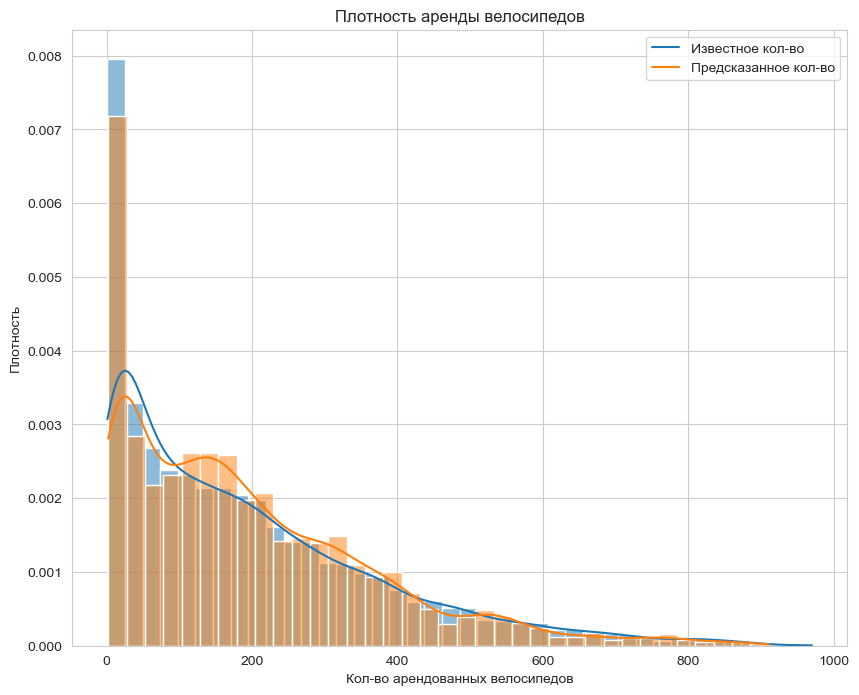

In [42]:
ypredict = model.predict(test)

sb.set_style("whitegrid")
plt0, axes = plt.subplots(1, 1, figsize=(10, 8))

plt1 = sb.histplot(train_data['count'], stat="density", kde=True, ax=axes)
plt1.set_title("Плотность аренды велосипедов")
plt1.set_xlabel('Кол-во арендованных велосипедов')
plt1.set_ylabel('Плотность')

plt1 = sb.histplot(ypredict, stat="density", kde=True, ax=axes)
plt1.set_xlabel('Кол-во арендованных велосипедов')
plt1.set_ylabel('Плотность')
plt1.legend(["Известное кол-во", "Предсказанное кол-во"])


На графике видно, что линии плотности довольно близки, но график построенный на предсказанных значениях, хоть и отображает общую тенденцию, менее гладкий.

